# Perceptron 

## Artificial perceptron
- Single layer neural network 
- It acts as linear classifier, binary classification
- Loss function: Binary cross entropy
- Gradient Descent

In [118]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

#### Generating Data

In [121]:
# X,y = make_moons(n_samples=1000,shuffle=True, noise=0.2, random_state=1)

# # for non linear data set MLP multi layer perceptron is used 

In [134]:
X,y = make_blobs(n_samples=500,
    n_features=2,
    centers=2,
    random_state=7)

In [135]:
print(X.shape,y.shape)

(500, 2) (500,)


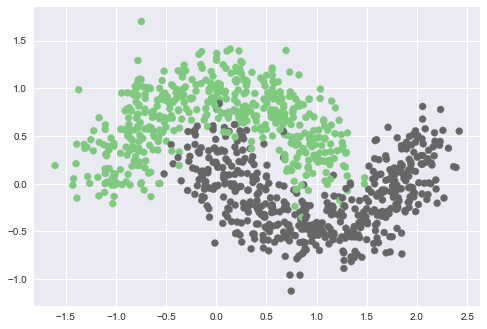

In [124]:
"""make_moons - non linear dataset"""

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

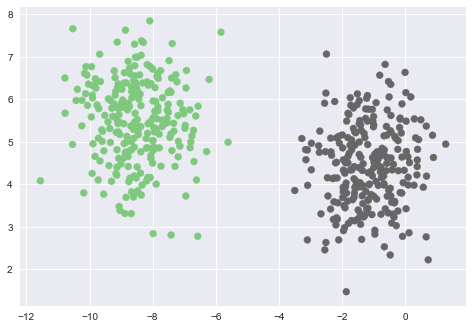

In [136]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

### Model and helper function

In [137]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

### Implememt Perceptron Learning Algo 
- learn the weights
- reduce the loss
- make the predictions

In [138]:
def predict(X,weights):
    # dot product (x.w)
    # x = mxn weights = nx1
    z = np.dot(X,weights)  # z = (X.w)
    predictions = sigmoid(z)
    return predictions  # predictions = mx1

def loss(X,y,weights):
    """Binary Cross Entropy"""
    y_ = predict(X,weights)
    cost = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
    return cost

def update(X,y,weights,lr):
    """Perform weight updates for 1 epoch"""
    y_ = predict(X,weights)
    dw = np.dot(X.T,y_-y) 
    m = X.shape[0]
    weights = weights - lr * dw/(float(m))
    return weights

def train(X,y,lr = 0.5, maxEpoch = 500):
    # modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    #init weights 0
    weights = np.zeros(X.shape[1]) #n+1 entries
    
    #iterate over all epochs and make updates
    for epoch in range(maxEpoch):
        weights = update(X,y,weights,lr)
        if epoch%10 == 0:
            l = loss(X,y,weights)
            print("Epoch %d loss %0.4f"%(epoch,l))
    return weights

In [139]:
train(X,y)

Epoch 0 loss 0.9421
Epoch 10 loss 0.0598
Epoch 20 loss 0.0470
Epoch 30 loss 0.0404
Epoch 40 loss 0.0363
Epoch 50 loss 0.0334
Epoch 60 loss 0.0313
Epoch 70 loss 0.0296
Epoch 80 loss 0.0283
Epoch 90 loss 0.0272
Epoch 100 loss 0.0262
Epoch 110 loss 0.0254
Epoch 120 loss 0.0247
Epoch 130 loss 0.0241
Epoch 140 loss 0.0235
Epoch 150 loss 0.0230
Epoch 160 loss 0.0226
Epoch 170 loss 0.0221
Epoch 180 loss 0.0218
Epoch 190 loss 0.0214
Epoch 200 loss 0.0211
Epoch 210 loss 0.0207
Epoch 220 loss 0.0205
Epoch 230 loss 0.0202
Epoch 240 loss 0.0199
Epoch 250 loss 0.0197
Epoch 260 loss 0.0194
Epoch 270 loss 0.0192
Epoch 280 loss 0.0190
Epoch 290 loss 0.0188
Epoch 300 loss 0.0186
Epoch 310 loss 0.0184
Epoch 320 loss 0.0182
Epoch 330 loss 0.0180
Epoch 340 loss 0.0178
Epoch 350 loss 0.0177
Epoch 360 loss 0.0175
Epoch 370 loss 0.0174
Epoch 380 loss 0.0172
Epoch 390 loss 0.0171
Epoch 400 loss 0.0169
Epoch 410 loss 0.0168
Epoch 420 loss 0.0166
Epoch 430 loss 0.0165
Epoch 440 loss 0.0164
Epoch 450 loss 0.0163

array([2.02794408, 2.60094278, 1.98880021])

In [140]:
""" weights =  array([-0.48206688, -2.21869581, -2.65379291] """

' weights =  array([-0.48206688, -2.21869581, -2.65379291] '

### Make Predictions

In [141]:
def getPredictions(X_test,weights,labels=True):
    if X_test.shape[1]!=weights.shape[0]:  # x0=1 if X_test X0!=1 that means it is still mxn not mxn+1 then weight.shape[0]
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    
    if not labels: 
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [142]:
# a = np.zeros((5,5))
# a[2,3] = 10
# a[a>0] = 20
# print(a)

In [143]:
weights = np.array([2.02794408, 2.60094278, 1.98880021])

In [144]:
x1 = np.linspace(-12,2,10)
print(x1)

x2 = -(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-12.         -10.44444444  -8.88888889  -7.33333333  -5.77777778
  -4.22222222  -2.66666667  -1.11111111   0.44444444   2.        ]
[14.6738567  12.63950907 10.60516144  8.57081381  6.53646618  4.50211855
  2.46777092  0.4334233  -1.60092433 -3.63527196]


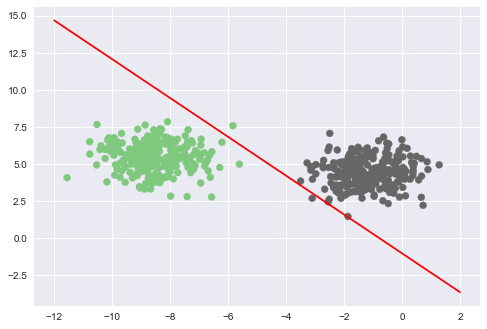

In [145]:
plt.scatter(X[:,0],X[:,1],c=y, cmap = plt.cm.Accent)
plt.plot(x1,x2,c = 'red')
plt.show()

### Find Accuracy

In [146]:
y_ = getPredictions(X,weights,labels = True)
# compare y and y_
trianing_acc = np.sum(y == y_)/y.shape[0]
print(trianing_acc)

0.996
